# We will start with the Regression techinique and show you how effective is Gradient Method

$ŷ = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} + ⋯ + θ_{n}x_{n}$

* ŷ is the predicted value.
* n is the number of features.
* x i is the i th feature value.
* θ j is the j th model parameter (including the bias term $θ_{0}$ and the feature weights
$θ_{1}, θ_{2}, .... θ_{n},$ ).

**vectorized form**

$ŷ = h_{θ}x = θ^T·x$

* θ is the model’s parameter vector, containing the bias term θ 0 and the feature
weights $θ_{1}$ to $θ_{n}$.
* $θ^T$ is the transpose of θ (a row vector instead of a column vector).
* x is the instance’s feature vector, containing $x_{0}$ to $x_{n}$ , with $x_{0}$ always equal to 1.
* $θ^T·x$ is the dot product of $θ^T$ and x.
* $h_{θ}$ is the hypothesis function, using the model parameters θ.

**MSE cost function for a Linear Regression model**

$MSE(X,h_{θ}) = \frac{1}m\sum_{i=1}^{m} (θ^T . x^{(i)} - y^{(i)})^2 $

**Normal Equation**

$\hat{θ} = (X^T · X)^{-1}.X^T.y$

In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

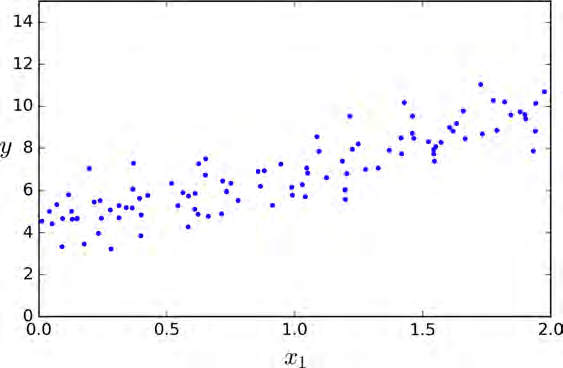

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[ 3.87100041],
       [ 2.98761704]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87100041],
       [ 9.84623449]])

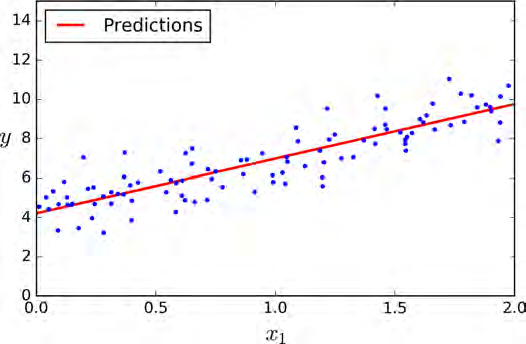

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.87100041]), array([[ 2.98761704]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.87100041],
       [ 9.84623449]])

# Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum

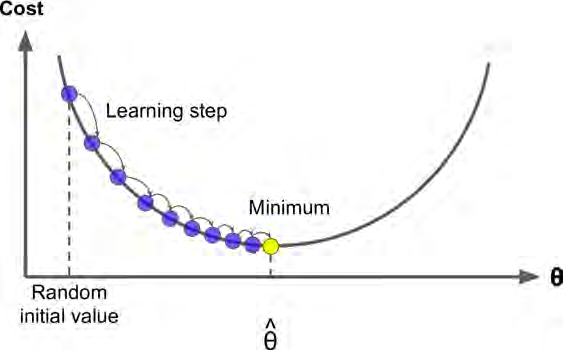

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

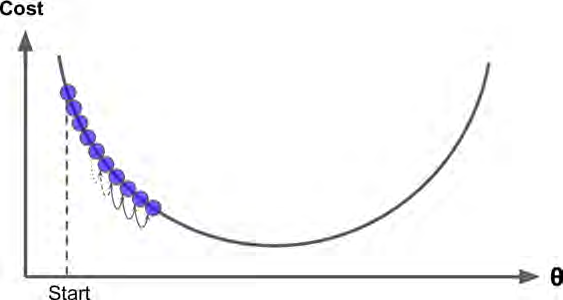

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

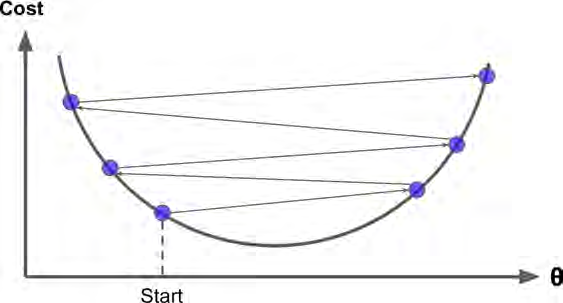

**the two main challenges with Gradient Descent: if the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local mini‐
mum, which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.**

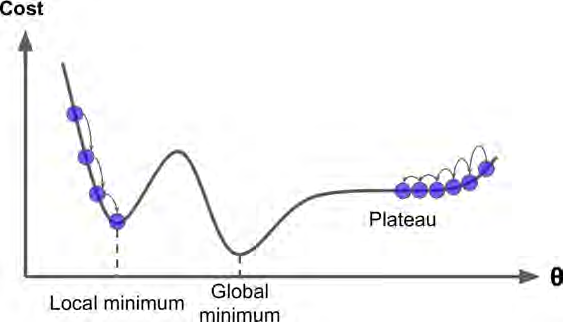

MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum

Gradient Descent on a train‐
ing set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right)

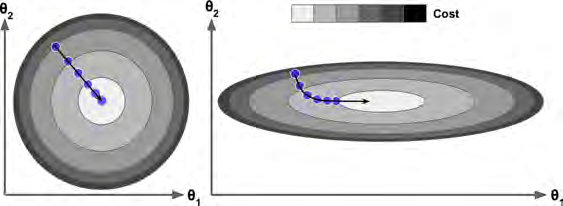

**Since feature 1 is smaller, it takes a larger change in θ 1 to affect the cost function, which is why the bowl is
elongated along the θ 1 axis.**

the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a nee‐
dle in a 300-dimensional haystack is much trickier than in three dimensions. Fortu‐
nately, since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl.

# Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regards to each model parameter θ j . In other words, you need to calculate
how much the cost function will change if you change θ j just a little bit. This is called
a partial derivative.

$\frac{\partial}{\partial{θ_j}}MSE(X,) = \frac{2}m\sum_{i=1}^{m} (θ^T . x^{(i)} - y^{(i)})x^{(i)}$

**Gradient vector of the cost function**

$∇_{θ}MSE(θ) = \frac{2}m X^T ·(X · θ − y)$

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step. As a result it is terribly slow on very large train‐
ing sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hun‐
dreds of thousands of features is much faster using Gradient
Descent than using the Normal Equation.

**Gradient Descent step**

$θ^{(next step)} = θ − η∇_θMSE(θ)$

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
# random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[ 3.87100041],
       [ 2.98761704]])

Figureshows the
first 10 steps of Gradient Descent using three different learning rates (the dashed line
represents the starting point).

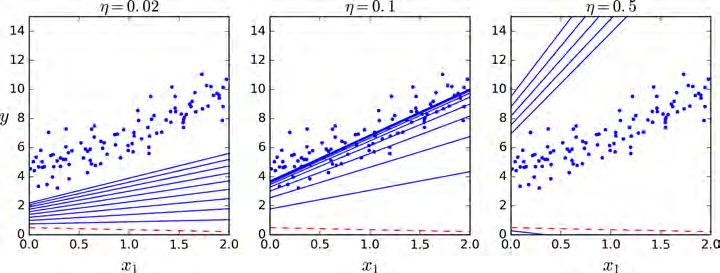

A simple solu‐
tion is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ε (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

# Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance.

due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algo‐
rithm stops, the final parameter values are good, but not optimal.

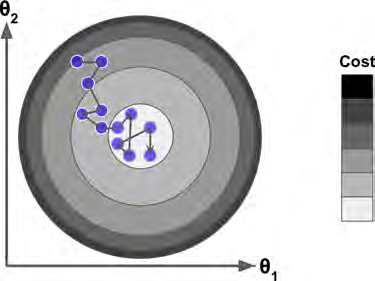

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.


Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is called simulated annealing,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. The function that determines the learning rate at each iteration
is called the learning schedule. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If the
learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early.

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[ 3.85224024],
       [ 2.96709725]])

Figure shows the first 10 steps of training (notice how irregular the steps are).

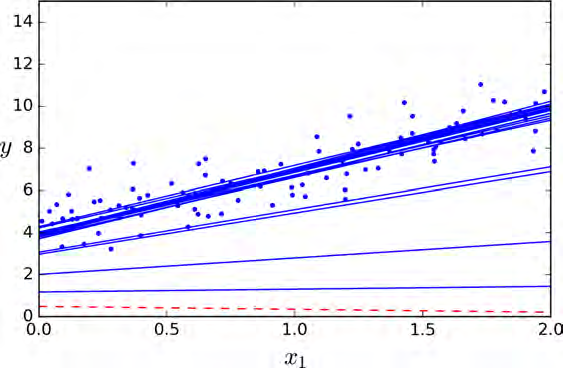

Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set, then go through it instance by instance, then shuffle it again, and so
on. However, this generally converges more slowly.

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.85477228]), array([ 2.96479143]))

# Mini-batch Gradient Descent

Mini-batch GD computes the gradients on small random sets of instances called mini-
batches. The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.


The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima

Figure shows the
paths taken by the three Gradient Descent algorithms in parameter space during
training. They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐
tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐
ing schedule.

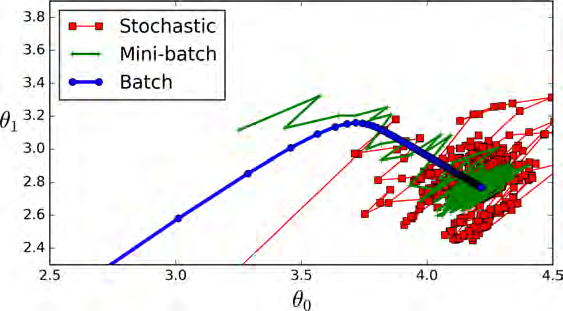